# EDA SQUAD Dataset

### Mounting drive

In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### CSV to Dataframe

In [30]:
csv_file_dir = "../../../train-v1.1.csv"

df = pd.read_csv(csv_file_dir, sep="¬", engine="python", doublequote=False)
df

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"[{'answer_start': 515, 'text': 'Saint Bernadet..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"[{'answer_start': 188, 'text': 'a copper statu..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"[{'answer_start': 279, 'text': 'the Main Build..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,"[{'answer_start': 381, 'text': 'a Marian place..."
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,"[{'answer_start': 92, 'text': 'a golden statue..."
...,...,...,...,...,...
88123,5735d259012e2f140011a09d,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,"[{'answer_start': 229, 'text': 'Oregon'}]"
88124,5735d259012e2f140011a09e,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,"[{'answer_start': 414, 'text': 'Rangoon'}]"
88125,5735d259012e2f140011a09f,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,"[{'answer_start': 476, 'text': 'Minsk'}]"
88126,5735d259012e2f140011a0a0,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,"[{'answer_start': 199, 'text': '1975'}]"


### Distribution of the n° of characters in "context" field

In [31]:
unique_ctx = pd.Series(df["context"].unique(), name="context").to_frame()
unique_ctx

,context
0,"Architecturally, the school has a Catholic cha..."
1,"As at most other universities, Notre Dame's st..."
2,The university is the major seat of the Congre...
3,The College of Engineering was established in ...
4,All of Notre Dame's undergraduate students are...
...,...
19121,"Institute of Medicine, the central college of ..."
19122,Football and Cricket are the most popular spor...
19123,The total length of roads in Nepal is recorded...
19124,The main international airport serving Kathman...


In [32]:
chars_per_ctx = pd.Series(unique_ctx["context"].str.len(), name="Distribution of n° of characters of 'context'").to_frame()
chars_per_ctx

,Distribution of n° of characters of 'context'
0,695.0
1,1405.0
2,704.0
3,724.0
4,688.0
...,...
19121,522.0
19122,898.0
19123,584.0
19124,954.0


array([[<AxesSubplot:title={'center':"Distribution of n° of characters of 'context'"}>]],
      dtype=object)

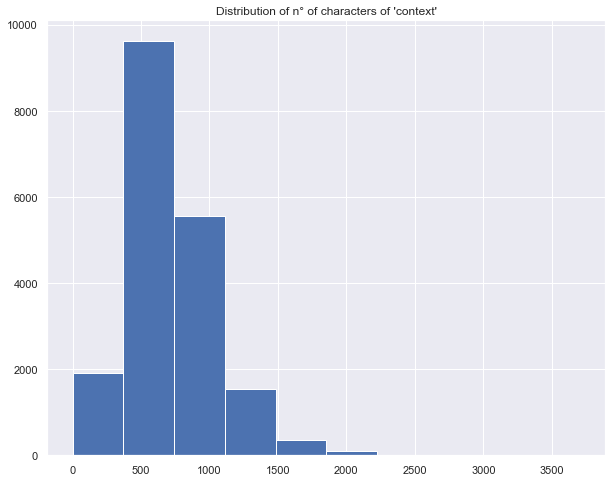

In [33]:
chars_per_ctx.hist()

<AxesSubplot:>

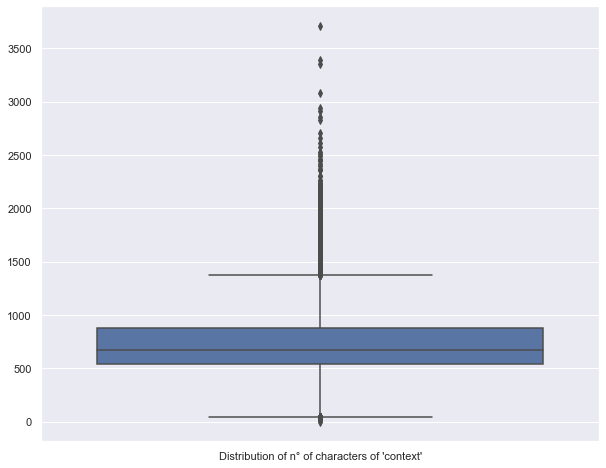

In [34]:
sns.boxplot(data=chars_per_ctx)

In [35]:
chars_per_ctx.describe()

,Distribution of n° of characters of 'context'
count,19124.000000
mean,725.667695
std,317.751266
min,1.000000
25%,541.750000
50%,673.000000
75%,874.000000
max,3706.000000


### Distribution of n° of characters in "question" field

array([[<AxesSubplot:title={'center':"Distribution of characters of 'question'"}>]],
      dtype=object)

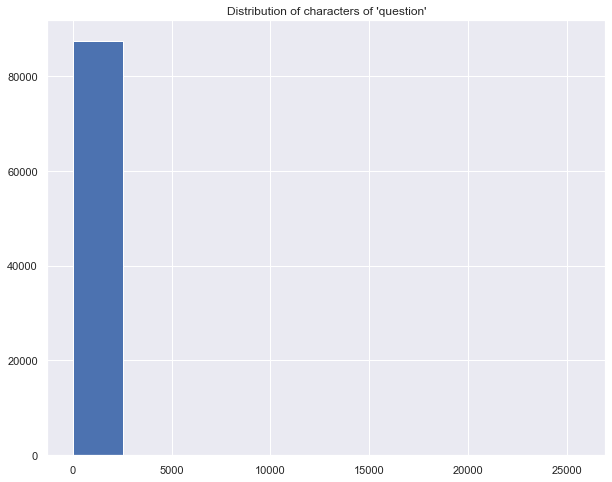

In [36]:
chars_per_qtn = pd.Series(df["question"].str.len(), name="Distribution of characters of 'question'").to_frame()
chars_per_qtn.hist()

In [37]:
chars_per_qtn.describe()

,Distribution of characters of 'question'
count,87326.000000
mean,59.586744
std,89.159577
min,1.000000
25%,44.000000
50%,56.000000
75%,71.000000
max,25651.000000


### Frequency of n° of words in "context" field

Defining function to preprocess corpus to obtain word frequency

In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter

# nltk.download('stopwords')
# nltk.download('punkt')


stop = list(set(stopwords.words("english")))

def preproc_freq_word_corpus(feature: pd.Series):
    _data = feature.unique()
    _corpus = []

    for i in _data:
        text = re.sub(r"[^a-z\s]", "", str(i).lower())
        tokens = word_tokenize(text)
        for token in tokens:
            if len(token) > 2 and token not in stop:
                _corpus.append(token)
    return _corpus

[Text(0.5, 1.0, "Word Frequency in 'context'")]

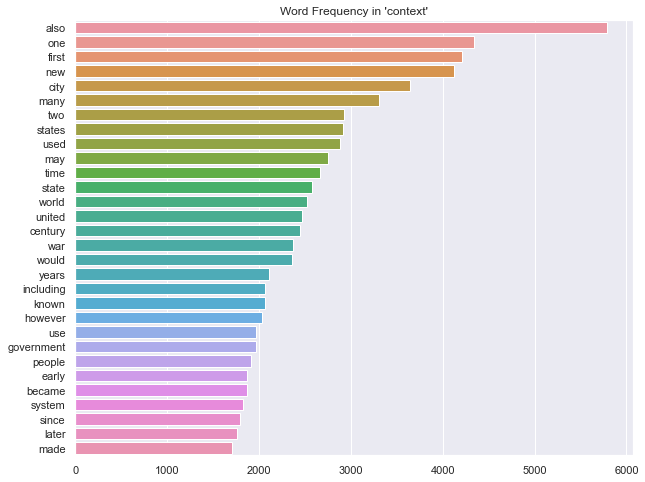

In [39]:
ctx_corpus = preproc_freq_word_corpus(feature=df["context"])

counter = Counter(ctx_corpus)

most=counter.most_common()

x, y = [], []

for word, count in most[:30]:
    x.append(word)
    y.append(count)

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Word Frequency in 'context'")

### Frequency of n° of words in "question" field

[Text(0.5, 1.0, "Word Frequency in 'question'")]

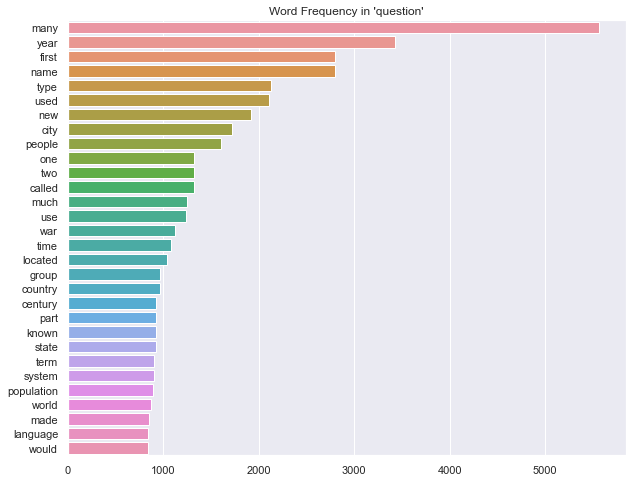

In [40]:
qtn_corpus = preproc_freq_word_corpus(feature=df["question"])

counter = Counter(qtn_corpus)

most=counter.most_common()

x, y = [], []

for word, count in most[:30]:
    x.append(word)
    y.append(count)

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Word Frequency in 'question'")

### Ngram exploration

Defining function to get ngrams from a courpus using Bag of Words to count the frequency.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:10]

Defining function to preprocess text from a dataset feature.

In [42]:
def preproc_corpus(feature: pd.Series):
    _data = feature.unique()
    _corpus = []

    for i in _data:
        text = re.sub(r"[^a-z\s]", "", str(i).lower())
        tokens = word_tokenize(text)
        tokens_no_stop = []
        for token in tokens:
            if len(token) > 2 and token not in stop:
                tokens_no_stop.append(token)
        _corpus.append(" ".join(tokens_no_stop))

    return _corpus

#### Bigrams from 'context' field

In [43]:
ctx_corpus = preproc_corpus(feature=df["context"])
top_n_bigrams = get_top_ngram(corpus=ctx_corpus, n=2)

[Text(0.5, 1.0, "Top Bigrams from 'context' field")]

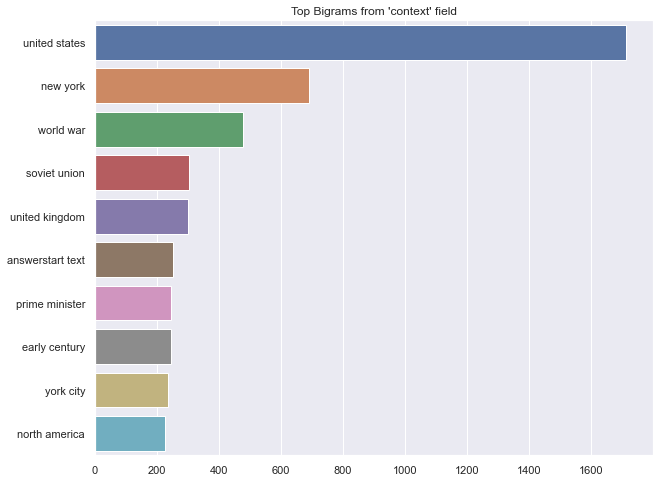

In [44]:
x, y = map(list, zip(*top_n_bigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Bigrams from 'context' field")

#### Bigrams from 'question' field

In [45]:
qtn_corpus = preproc_corpus(feature=df["question"])
top_n_bigrams = get_top_ngram(corpus=qtn_corpus, n=2)

[Text(0.5, 1.0, "Top Bigrams from 'question' field")]

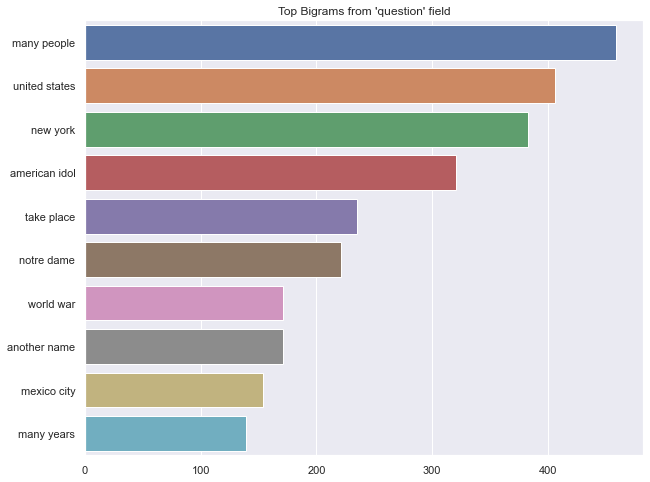

In [46]:
x, y = map(list, zip(*top_n_bigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Bigrams from 'question' field")

#### Trigrams from 'context' field

In [47]:
ctx_corpus = preproc_corpus(feature=df["context"])
top_n_trigrams = get_top_ngram(corpus=ctx_corpus, n=3)

[Text(0.5, 1.0, "Top Trigrams from 'context' field")]

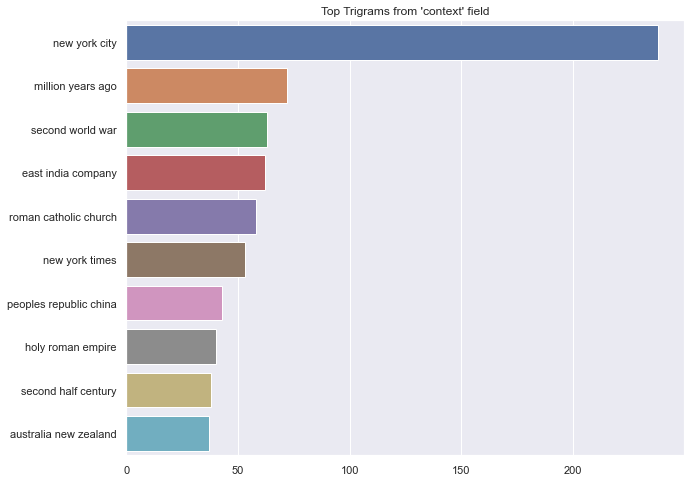

In [48]:
x, y = map(list, zip(*top_n_trigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Trigrams from 'context' field")

#### Trigrams from 'question' field

In [49]:
qtn_corpus = preproc_corpus(feature=df["question"])
top_n_trigrams = get_top_ngram(corpus=qtn_corpus, n=3)

[Text(0.5, 1.0, "Top Trigrams from 'question' field")]

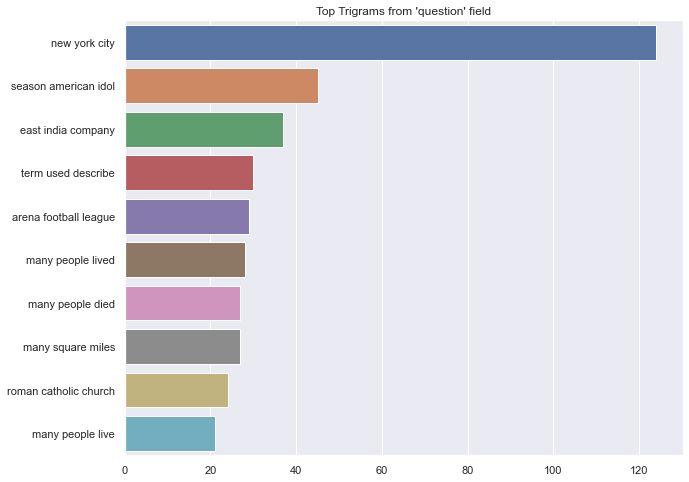

In [50]:
x, y = map(list, zip(*top_n_trigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Trigrams from 'question' field")

### Topic Exploration

In [51]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize(data: pd.Series):
    corpus = []
    lem = WordNetLemmatizer()

    for text in data:
        words = [w for w in word_tokenize(text) if w not in stop]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]

        corpus.append(words)
    return corpus

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
corpus = lemmatize(df["context"])

TypeError: expected string or bytes-like object

In [ ]:
corpus

[['Architecturally',
  'school',
  'Catholic',
  'character',
  'Atop',
  'Main',
  'Building',
  'gold',
  'dome',
  'golden',
  'statue',
  'Virgin',
  'Mary',
  'Immediately',
  'front',
  'Main',
  'Building',
  'facing',
  'copper',
  'statue',
  'Christ',
  'arm',
  'upraised',
  'legend',
  'Venite',
  'Omnes',
  'Next',
  'Main',
  'Building',
  'Basilica',
  'Sacred',
  'Heart',
  'Immediately',
  'behind',
  'basilica',
  'Grotto',
  'Marian',
  'place',
  'prayer',
  'reflection',
  'replica',
  'grotto',
  'Lourdes',
  'France',
  'Virgin',
  'Mary',
  'reputedly',
  'appeared',
  'Saint',
  'Bernadette',
  'Soubirous',
  '1858',
  'end',
  'main',
  'drive',
  'direct',
  'line',
  'connects',
  'statue',
  'Gold',
  'Dome',
  'simple',
  'modern',
  'stone',
  'statue',
  'Mary'],
 ['Architecturally',
  'school',
  'Catholic',
  'character',
  'Atop',
  'Main',
  'Building',
  'gold',
  'dome',
  'golden',
  'statue',
  'Virgin',
  'Mary',
  'Immediately',
  'front',
  'M

In [ ]:
import gensim

dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                      num_topics=5,
                                      id2word=dic,
                                      passes = 10,
                                      workers= 2)

lda_model.show_topics()

[(0,
  '0.012*"The" + 0.007*"used" + 0.006*"may" + 0.005*"also" + 0.005*"system" + 0.005*"use" + 0.004*"specie" + 0.004*"This" + 0.004*"one" + 0.003*"often"'),
 (1,
  '0.015*"The" + 0.006*"century" + 0.005*"also" + 0.004*"first" + 0.004*"work" + 0.004*"church" + 0.004*"religious" + 0.003*"one" + 0.003*"Church" + 0.003*"mosaic"'),
 (2,
  '0.018*"The" + 0.005*"first" + 0.004*"year" + 0.004*"United" + 0.004*"also" + 0.004*"League" + 0.003*"film" + 0.003*"team" + 0.003*"game" + 0.003*"member"'),
 (3,
  '0.016*"The" + 0.005*"century" + 0.005*"state" + 0.004*"language" + 0.004*"force" + 0.004*"war" + 0.004*"people" + 0.004*"War" + 0.004*"power" + 0.004*"military"'),
 (4,
  '0.024*"The" + 0.014*"city" + 0.008*"area" + 0.005*"New" + 0.005*"also" + 0.005*"population" + 0.005*"largest" + 0.004*"year" + 0.004*"City" + 0.003*"million"')]

In [ ]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=75e2be37a068f2615c6f2025d6dea6149e7dfe65a2c0d0ea3b19566e68dda7e6
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dic)
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.140159 -0.215791       1        1  22.426631
3      0.006504  0.127173       2        1  22.261498
2     -0.085845  0.087489       3        1  20.393879
1      0.171471  0.092111       4        1  17.936635
4     -0.232288 -0.090982       5        1  16.981356, topic_info=           Term          Freq         Total Category  logprob  loglift
2713       city  17158.000000  17158.000000  Default  30.0000  30.0000
612        area  11955.000000  11955.000000  Default  29.0000  29.0000
2454    century  14574.000000  14574.000000  Default  28.0000  28.0000
4733        war   5986.000000   5986.000000  Default  27.0000  27.0000
4435        may  10084.000000  10084.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
274         one   3483.679208  19100.286017   Topic5  -5.7354   0.0714
238        part   2830.331386  10744.312399   Topic5  -5.9431   0.4391
316   including   2714.285312   9959.904933   Topic5  -5.9849   0.4730
474     country   2562.070415  10464.722741   Topic5  -6.0427   0.3659
724        many   2479.601854  12625.373462   Topic5  -6.0754   0.1454

[394 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
8634       3  0.998709  1979
2691       3  0.998750  1992
1390       3  0.841062  2009
1390       5  0.159024  2009
4204       2  0.116790   Act
...      ...       ...   ...
145        2  0.158497  year
145        3  0.339261  year
145        4  0.132061  year
145        5  0.281419  year
13886      1  0.999605  zinc

[758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])